# 3. 成功と失敗のベイズ分析

$$X_{i}=\begin{eqnarray}
\left\{
\begin{array}{l}
1&(納期に遅れる)\\
0&(納期を守る)
\end{array}
\right.
\end{eqnarray} $$

$X_{i}$は納期に遅れるかどうかによってランダムに値が変化する確率変数の一種。納期に遅れる確率は$\pi$とすると、$X_{i}$の確率分布は、

$$Pr\{X_{i}=x_{i}\}=\begin{eqnarray}
\left\{
\begin{array}{l}
\pi &(x_{i}=1)\\
1-\pi &(x_{i}=0)
\end{array}
\right.
\end{eqnarray}
$$

$$p(x_{i}|\pi)=Pr\{X_{i}=x_{i}\}=\pi^{x_{i}}(1-\pi)^{1-x_{i}},\ (x_{i}=0,1)$$

ベルヌーイ分布（試行）に関するベイズ推測の目的はベルヌーイ分布より生成されたデータから未知のパラメータ$\pi$を推測することであると言える。

納期の遅れに関する事前情報があまりないと想定すると、どの値が$\pi$としてふさわしいかわかりません。そこで0と1の間の全ての値に同じ密度を割り振ることにしましょう。これは$\pi$の事前分に0と1の一様分布を使うことを意味します。


$$p(\pi)=\begin{eqnarray}
\left\{
\begin{array}{l}
1&(0< \pi < 1) \\
0&(\pi \leq 0,1\geq \pi)
\end{array}
\right.
\end{eqnarray}
$$

n回目の納期まで連続して遅れてしまったという状況での$\pi$の事後分布は

$$p(\pi|(x_{1},\ldots ,x_{n})=(1,\ldots,1))=(n+1)\pi^{n}$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import itertools
%matplotlib inline

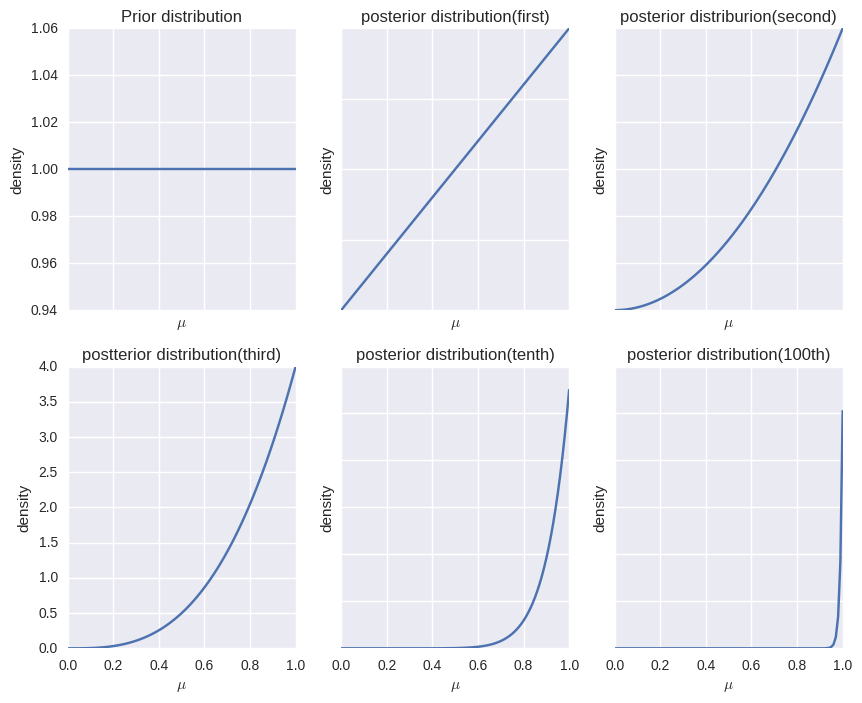

In [2]:
data = np.linspace(0.0,1.0,101)
fig,ax = plt.subplots(2,3,figsize=(10,8),sharex=True)
fig.set_label('$\pi$')
ax[0][0].plot(data,np.ones(101))
ax[0][0].set_title('Prior distribution')
ax[0][1].plot(data,2*data)
ax[0][1].set_title('posterior distribution(first)')
ax[0][2].plot(data,3*data**2)
ax[0][2].set_title('posterior distriburion(second)')
ax[1][0].plot(data,4*data**3)
ax[1][0].set_title('postterior distribution(third)')
ax[1][1].plot(data,11*data**10)
ax[1][1].set_title('posterior distribution(tenth)')
ax[1][2].plot(data,101*data**100)
ax[1][2].set_title('posterior distribution(100th)')
for a in ax.flat:
    a.set(xlabel='$\mu$',ylabel='density')
for a in ax.flat:
    a.label_outer()

納期に遅れることもあれば、納期をきちんと守るときもあるという現実的な状況を考える。

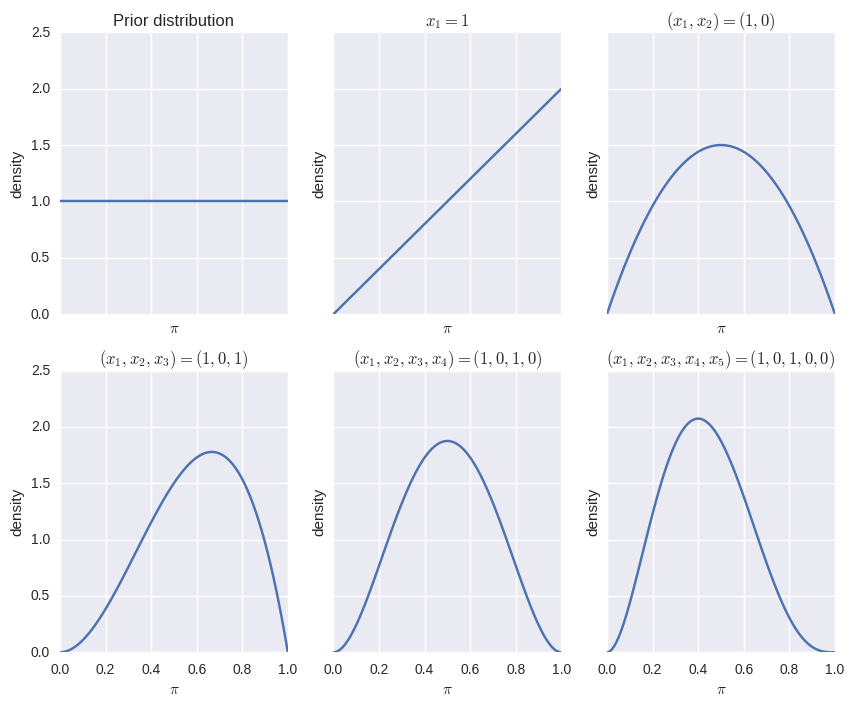

In [3]:
data = np.linspace(0,1,101)
fig,ax = plt.subplots(2,3,figsize=(10,8),sharex=True,sharey=True)
ax[0][0].plot(data,np.ones(101))
ax[0][0].set_title('Prior distribution')
ax[0][1].plot(data,2*data)
ax[0][1].set_title('$x_{1}=1$')
ax[0][2].plot(data,6*data*(1-data))
ax[0][2].set_title('$(x_{1},x_{2})=(1,0)$')
ax[1][0].plot(data,12*(data**2)*(1-data))
ax[1][0].set_title('$(x_{1},x_{2},x_{3})=(1,0,1)$')
ax[1][1].plot(data,30*(data**2)*((1-data)**2))
ax[1][1].set_title('$(x_{1},x_{2},x_{3},x_{4})=(1,0,1,0)$')
ax[1][2].plot(data,60*(data**2)*((1-data)**3))
ax[1][2].set_title('$(x_{1},x_{2},x_{3},x_{4},x_{5})=(1,0,1,0,0)$')
for a in ax.flat:
    a.set(xlabel='$\pi$',ylabel='density')
for a in ax.flat:
    a.label_outer()

過去n回の納期における遅延の状況がデータ$D=(x_{1},\ldots,x_{n})$として与えられている場合の$\pi$の事後分布は、

$$p(\pi|D)=\frac{\pi^{y_{n}} (1-\pi)^{n-y_{n}}}{B(y_{n}+1,n-y_{n}+1)}$$

となる。$B(\cdot)$はベータ関数です。

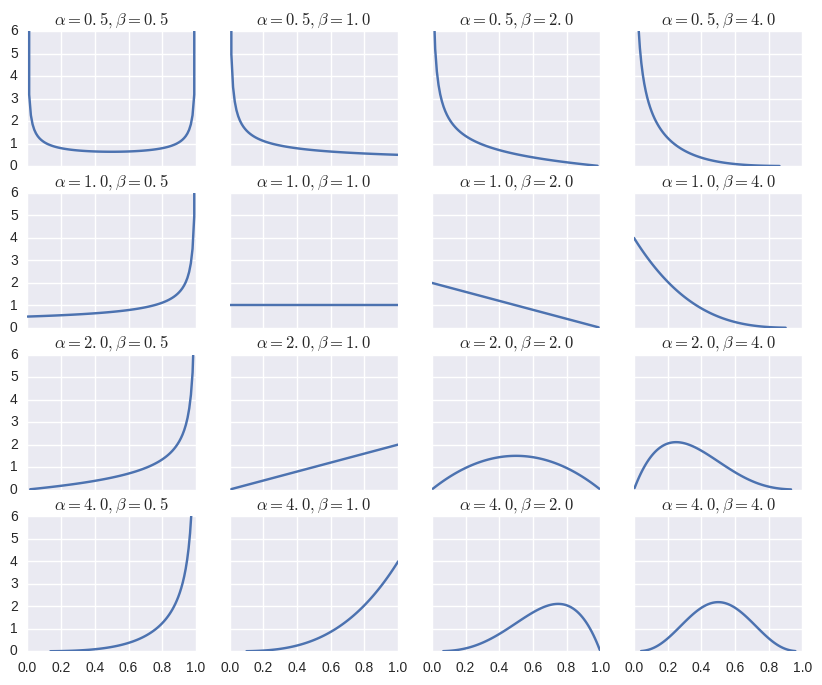

In [4]:
import scipy
import itertools
x = np.array([0.5,1.,2.,4.])
fig,ax = plt.subplots(4,4,figsize=(10,8),sharex=True,sharey=True)
for i,j in itertools.product(range(4),range(4)):
    data = np.linspace(scipy.stats.beta.ppf(0.0001,x[i],x[j]),
                       scipy.stats.beta.ppf(0.9999,x[i],x[j]),100)
    ax[i][j].plot(data,scipy.stats.beta.pdf(data,x[i],x[j]))
    ax[i][j].set_title(r'$\alpha={0},\beta={1}$'.format(x[i],x[j]))
plt.ylim([0,6])
plt.show()

全ての納期の回数をnと納期におくれた回数$y_{n}$の比率$y_{n}/n=0.8$に固定しておき、nを5,10,100,1000と増やしていった時に$\pi$の事後分布がどのように変化していくかを見てみましょう。

$$p(\pi|D)=\frac{\pi^{0.8n}(1-\pi)^{0.2n}}{B(0.8n+1,0.2n+1)}$$

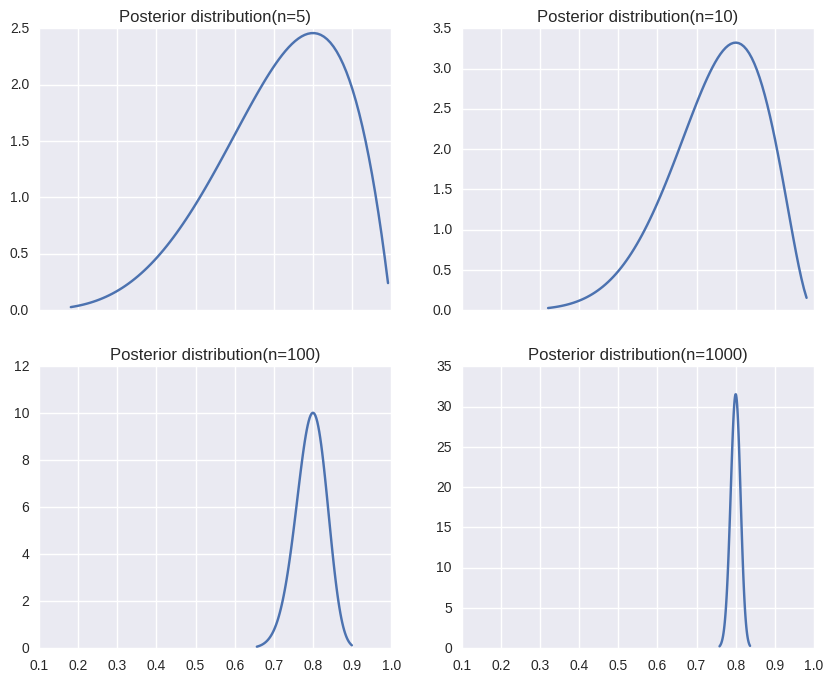

In [5]:
import scipy
x = [5,10,100,1000]
fig,ax = plt.subplots(2,2,figsize=(10,8),sharex=True)
for i,j in enumerate(itertools.product(range(2),range(2))):
    data = np.linspace(scipy.stats.beta.ppf(0.001,(0.8*x[i]+1),(0.2*x[i]+1)),
                       scipy.stats.beta.ppf(0.999,(0.8*x[i]+1),(0.2*x[i]+1)),100)
    ax[j[0]][j[1]].plot(data,scipy.stats.beta.pdf(data,(0.8*x[i]+1),(0.2*x[i]+1)))
    ax[j[0]][j[1]].set_title('Posterior distribution(n={0})'.format(x[i]))


応用事例によっては具体的な数値が必要な時もあります。例えば企業が破綻する確率を推測したいとしましょう。この場合、私達が知りたいのは、破綻確率はグラフでこの辺であると言った曖昧な情報ではなく、むしろ企業が具体的に何％の確率で破綻するかでしょう。

ベイズ分析における点推定を一言でいうと、「パラメータの真の値の候補の中から真の値として最もふさわしい値を選ぶこと」と言える。

パラメータの真の値と点推定の乖離をある尺度（つまり損失関数）で測ってやり、この損失感ができるだけ小さくなるように点推定を決めることになります。


ベイズ分析の点推定では、損失関数$L(\pi,\delta)$の期待値を$\pi$の事後分で評価したもの

$$R(\delta|D)=E_{p(\pi|D)}[L(\pi,\delta)]=\int_{0}^{1}L(\pi,\delta)p(\pi|D)d\pi$$

を考えこれをできるだけ小さくするように点推定を選択することにします。最小化問題として定式化すると、未知のパラメータ$\pi$の点推定$\delta^{*}$は

$$\delta^{*}=arg\ minR(\delta|D)=argmin\int_{0}^{1}L(\pi,\delta)p(\pi|D)d\pi$$

実現する可能性が高い推定誤差のみを小さくするような$\delta$を選ぶことができれば、それが最も望ましい点推定であると言えます。

一般に、2乗誤差損失は事後分布の平均、絶対誤差損失は事後分の中央値、0-1損失では事後分布のモードとして与えられます。

In [6]:
import scipy.stats
import pandas as pd
counts = [1,2,3,10,100]
stats = []
for count in counts:
    average = scipy.stats.beta.mean(1+count,1)
    median = scipy.stats.beta.median(1+count,1)
    stats.append([average,median])

In [7]:
pd.DataFrame(data=stats,
             index=[u'1回目',u'2回目',u'3回目',u'10回目',u'100回目'],
             columns=[u'平均',u'中央値'])

,平均,中央値
1回目,0.666667,0.707107
2回目,0.750000,0.793701
3回目,0.800000,0.840896
10回目,0.916667,0.938931
100回目,0.990196,0.993161


今まで説明してきた点推定は、結局のところ事後分布の「山の部分」が集まっている点を求めているに過ぎません。しかし、それが真の値である保証は全くない。データ数が少ない時に点推定という1点のみで事後分布を代表するのはかなり無理があります。

ベイズ分析では未知のパラメータ$\pi$の確率分布（事後分布）を使うため、$\pi$の真の値が区間$[a,b]$にある確率は、事後分布$p(\pi|D)$を用いると

$$Pr_{p(\pi|D)}\{a\leq\pi\leq b\}=\int_{a}^{b}p(\pi|D)d\pi$$

と与えられます。このように、パラメータの真の値が特定の区間内にある確率を直接的に評価できるのがベイズ分析の大きな利点です。

しかし、$Pr_{p(\pi|D)}\{a\leq\pi\leq b\}=0.95$になるような区間$[a,b]$は無数に存在します。そのため何らかの条件をつけてやらないと一意に決めることができません。ベイズ分析では信用区間と最高事後密度区間(HPD区間)があります。

信用区間は古典的統計学における信頼区間に対応するものです。しかし、信用区間では$a_{\alpha}\leq \pi \leq b_{\alpha}$という事象は「確率変数$\pi$が固定された区間$[a_{\alpha},b_{\alpha}]$に入る事象」と解釈されるのに対し、信頼区間では「確率的に変動する区間$[a_{\alpha},b_{\alpha}]$が非確率的な$\pi$を含む確率」と解釈されるという違いがあります。

他方、HPD区間は一言でいうと、区間内の確率密度が必ず区間外よりも高くなるような区間ということです。パラメータの真の値である可能性が高い区間という意味ではHPD区間が優れていると言えるでしょう。

(0.0, 1.0, 0.0, 1.0)

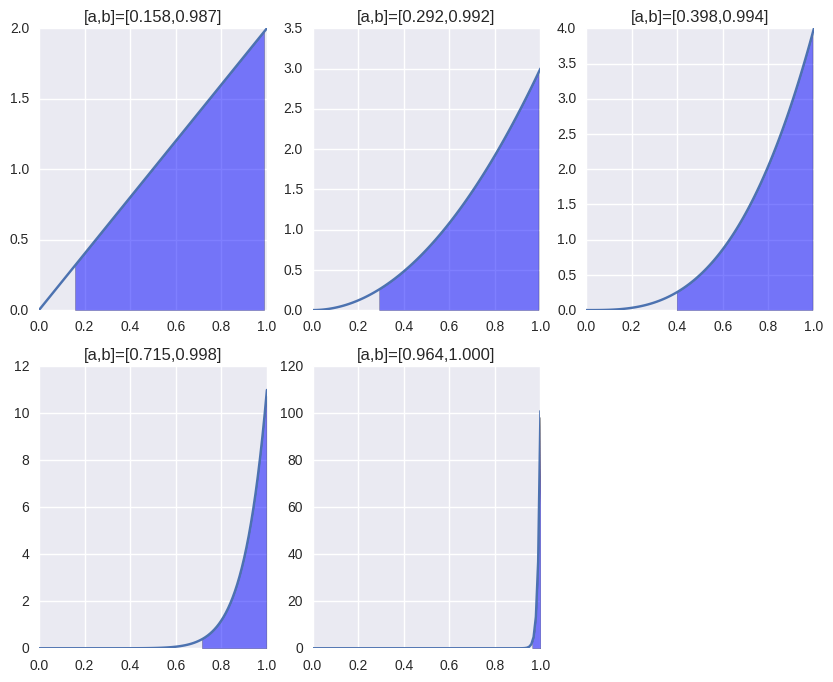

In [8]:
#信用区間(alpha=0.05)
import scipy
import numpy as np
counts = [1,2,3,10,100]
fig, ax = plt.subplots(2,3,figsize=(10,8))
for i,j in enumerate(itertools.product(range(2),range(3))):
    if i==5:
        break
    a_5 = scipy.stats.beta.ppf(0.025,counts[i]+1,1)
    a_95 = scipy.stats.beta.ppf(0.975,counts[i]+1,1)
    data_reliability_range = np.linspace(a_5,a_95,100)
    data = np.linspace(0.,1.,101)
    ax[j[0]][j[1]].plot(data,scipy.stats.beta.pdf(data,counts[i]+1,1))
    ax[j[0]][j[1]].fill_between(data_reliability_range,np.zeros(100),scipy.stats.beta.pdf(data_reliability_range,counts[i]+1,1),facecolor='b',alpha=0.5)
    ax[j[0]][j[1]].set_title('[a,b]=[{0:.3f},{1:.3f}]'.format(a_5,a_95))
ax[1][2].axis('off')

(0.0, 1.0, 0.0, 1.0)

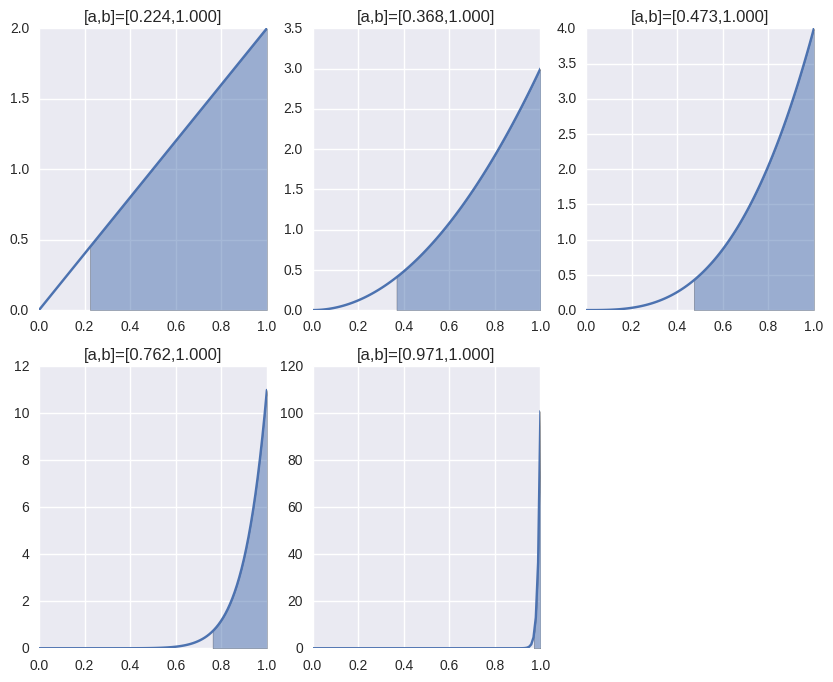

In [9]:
#HPD区間
counts = [1,2,3,10,100]
fig,ax = plt.subplots(2,3,figsize=(10,8))

for i,j in enumerate(itertools.product(range(2),range(3))):
    if i==5:
        break
    a_5 = scipy.stats.beta.ppf(0.05,counts[i]+1,1)
    data_reliability = np.linspace(a_5,1.0,100)
    data = np.linspace(0.0,1.0,100)
    ax[j[0]][j[1]].plot(data,scipy.stats.beta.pdf(data,counts[i]+1,1))
    ax[j[0]][j[1]].fill_between(data_reliability,np.zeros(100),scipy.stats.beta.pdf(data_reliability,counts[i]+1,1),alpha=0.5)
    ax[j[0]][j[1]].set_title('[a,b]=[{0:.3f},{1:.3f}]'.format(a_5,1.))
ax[1][2].axis('off')

定期預金と株価指数に連動した投資信託という2つの投資対象となる資産を考え、これらに手持ちの資金をどのように振り分けるのが最適であるかをベイズ的アプローチで決定する方法を考える。

定期預金は収益率（金利）が固定されているが、投資信託では収益率は不確実であると想定する。更に投資信託の収益率が連続的確率分布の代表例である正規分布に従うものと仮定して、投資信託に資金を託することの不確実性を表現することにする。

In [10]:
#日経平均の年次収益率と1年者定期預金金利
profit_rate = pd.DataFrame(index=[u'日経平均',u'定期預金'],
                           columns=[2000,2001,2002,2003,2004,2005],
                           data=np.array([[4.59,4.36,2.07,8.67,16.78,17.48],
                                          [0.17,0.06,0.04,0.04,0.04,0.07]]))

In [11]:
profit_rate

,2000,2001,2002,2003,2004,2005
日経平均,4.59,4.36,2.07,8.67,16.78,17.48
定期預金,0.17,0.06,0.04,0.04,0.04,0.07


ファンドの収益率を確率変数とみなし、それが特定の確率分布に従うとします。こうすることでファンドの収益率の不確実性を体系的に扱うことができるようになります。

ファンドの収益率の分布には正規分布を仮定する。以下のような状況を設定する。

- 直近n年のファンドの収益率データ$D=(x_{1},\ldots,x_{n})$は観測されている
- ファンドの将来の収益率$\tilde{x}$はわからない
- $x_{i}$と$\tilde{x}$は正規分布$N(\mu,\sigma)$から独立に生成されるものと仮定する。
- ファンドの期待収益率$\mu$は未知である。
- ファンドの収益率のボラティリティ$\sigma$はインプライド・ボラティリティで代用できる。

大まかにベイズ的アプローチによる資産運用の流れを示すと以下のようになる。
- ファンドの過去の運用実績に関するデータDを集める。
- 期待収益率$\mu$の予想を立てて$\mu$の事前分布$p(\mu)$を決定する
- 期待収益率$\mu$の事後分布$p(\mu|D)$を求める。
- 将来のファンドの収益率$\tilde{x}$の予測分布$p(\tilde{x}|D)$を求める。
- 予測分布$p(\tilde{x}|D)$を使って最適な投資配分を決める。


$\mu$の事前分布には正規分布を仮定する。

(0.0, 1.0, 0.0, 1.0)

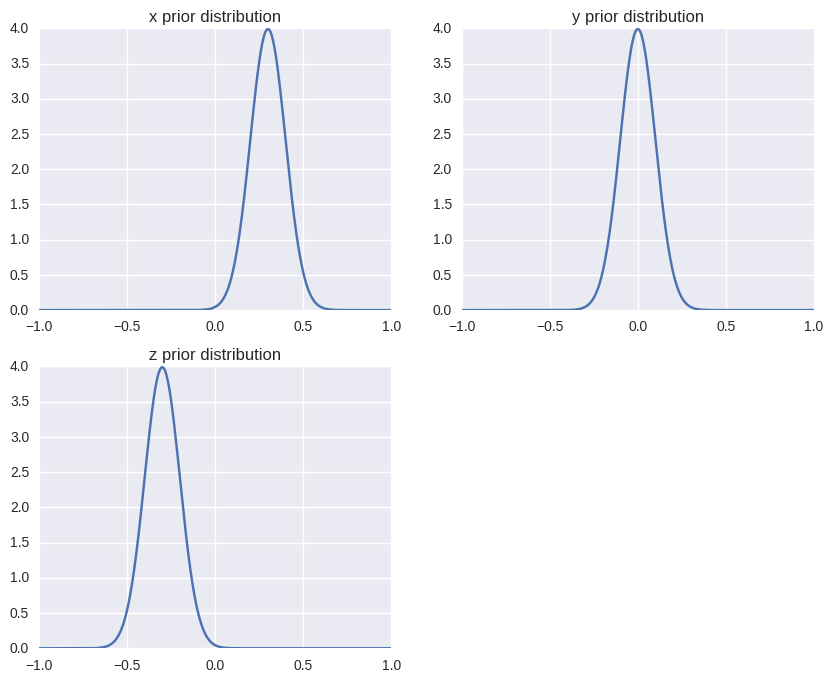

In [12]:
import scipy
data = np.linspace(-1,1,501)
x_predict = scipy.stats.norm.pdf(data,loc=0.3,scale=0.1)
y_predict = scipy.stats.norm.pdf(data,loc=0,scale=0.1)
z_predict = scipy.stats.norm.pdf(data,loc=-0.3,scale=0.1)

fig,ax = plt.subplots(2,2,figsize=(10,8))
ax[0][0].plot(data,x_predict)
ax[0][0].set_title('x prior distribution')
ax[0][1].plot(data,y_predict)
ax[0][1].set_title('y prior distribution')
ax[1][0].plot(data,z_predict)
ax[1][0].set_title('z prior distribution')
ax[1][1].axis('off')

In [13]:
#xの場合の事後分布,インプライドボラティリティ=0.2
from scipy.integrate import quad
quad(lambda x:(0.5)*np.exp(-0.5*(x**2)),-np.inf,np.inf)

(1.2533141373154997, 1.2756471096158012e-08)

## ボックスミューラー法

In [14]:
def box_muller(u1,u2):
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u2))*np.sin(2*np.pi*u1)
    return z1,z2

In [15]:
U_1 = scipy.stats.uniform.rvs(size=10000,random_state=10)
U_2 = scipy.stats.uniform.rvs(size=10000,random_state=12)

z_1,z_2 = box_muller(U_1,U_2)

(-4, 4)

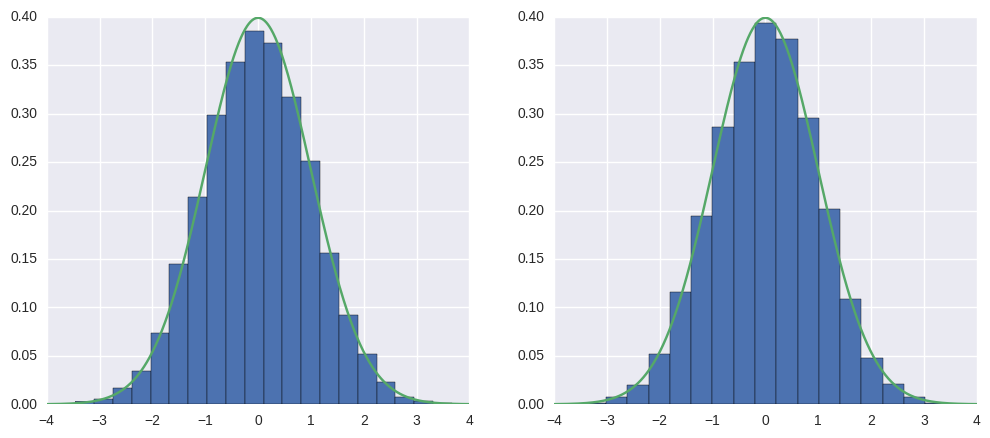

In [16]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
x = np.linspace(-5,5,1000)
ax[0].hist(z_1,normed=True,bins=20)
ax[0].plot(x,scipy.stats.norm.pdf(x))
ax[0].set_xlim(-4,4)

ax[1].hist(z_2,normed=True,bins=20)
ax[1].plot(x,scipy.stats.norm.pdf(x))
ax[1].set_xlim(-4,4)


## 逆変換法

In [17]:
def inverse(x,l):
    return -(1/l)*np.log(1-x)

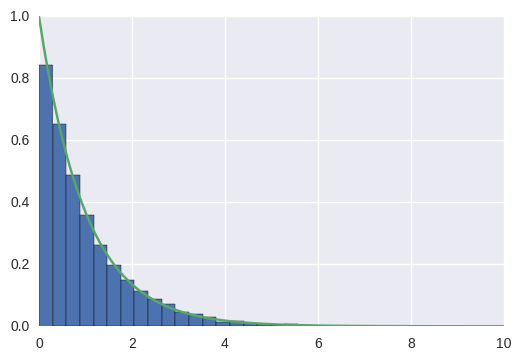

In [18]:
u = scipy.stats.uniform.rvs(size=10000,random_state=15)
x = inverse(u,1.)
y = np.linspace(0,10,100)
plt.hist(x,bins=30,normed=True)
plt.plot(y,scipy.stats.expon.pdf(y,scale=1))
plt.show()

## 採択棄却法
目標分布：ベータ分布

提案分布：一様分布

In [19]:
f = scipy.stats.beta(a=2.7,b=6.3).pdf

argM = scipy.optimize.fmin(lambda x:-f(x),0.0,disp=False)
M = f(argM)

x = M*scipy.stats.uniform.rvs(size=100000,random_state=10)
u = scipy.stats.uniform.rvs(size=100000,random_state=2)


In [20]:
x[u<=(f(x) / x)].shape

(24169,)

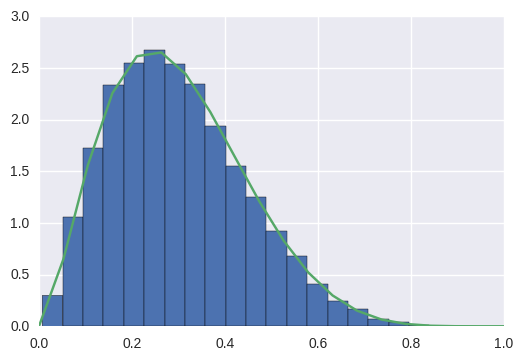

In [21]:
plt.hist(x[u<=f(x) / M],bins=20,normed=True)
y = np.linspace(0,1,20)
plt.plot(y,f(y))
plt.show()

## AR(1)過程

In [22]:
r = 0.0
x0 = 0
eps = scipy.stats.norm.rvs(loc=0,scale=np.sqrt(1-r**2),size=500)

In [23]:
def f(x,r,eps):
    xn = []
    for ep in eps:
        x = r*x + ep
        xn.append(x)
    return xn

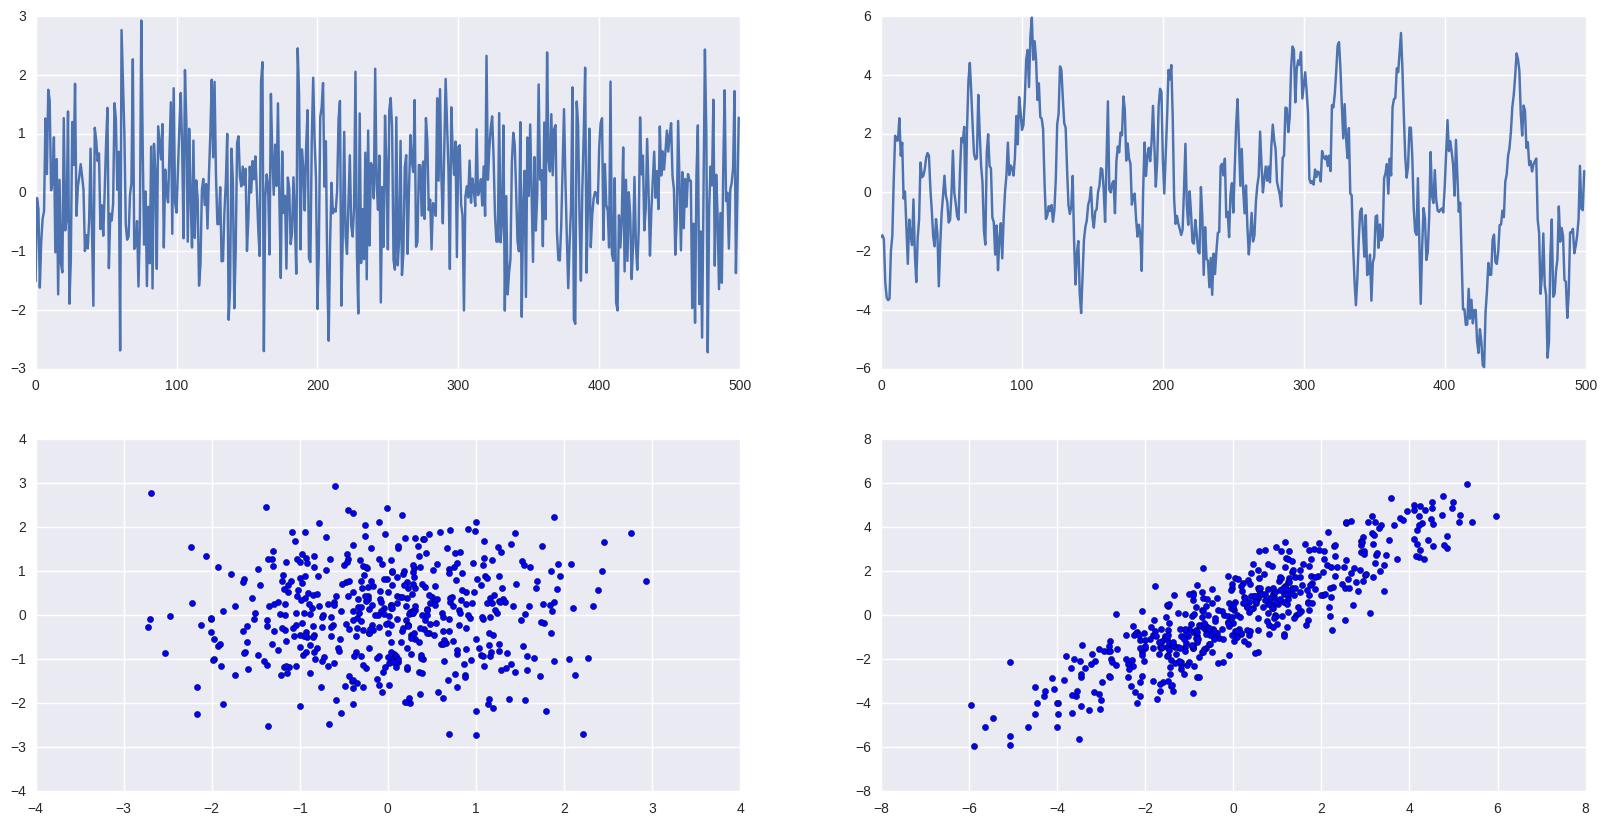

In [24]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
ax[0][0].plot(f(x=x0,r=0.0,eps=eps))
ax[0][1].plot(f(x=x0,r=0.9,eps=eps))
ax[1][0].scatter(f(x=x0,r=0.0,eps=eps)[:-1],f(x=x0,r=0.0,eps=eps)[1:])
ax[1][1].scatter(f(x=x0,r=0.9,eps=eps)[:-1],f(x=x0,r=0.9,eps=eps)[1:])

In [44]:
r = 0.9
x1 = scipy.stats.uniform.rvs(size=10000,scale=8,random_state=2) - 4
eps = scipy.stats.norm.rvs(loc=0,scale=np.sqrt(1-r**2),size=(20,10000))

(array([ 0.13126999,  0.1332703 ,  0.1280195 ,  0.12326878,  0.1280195 ,
         0.13427045,  0.12101843,  0.13152003,  0.12826954,  0.12426893,
         0.12301874,  0.12376885,  0.11651775,  0.1122671 ,  0.12426893,
         0.11876809,  0.12451897,  0.12126847,  0.12551912,  0.12726938]),
 array([ -3.99942702e+00,  -3.59948794e+00,  -3.19954887e+00,
         -2.79960979e+00,  -2.39967072e+00,  -1.99973164e+00,
         -1.59979257e+00,  -1.19985349e+00,  -7.99914415e-01,
         -3.99975339e-01,  -3.62635348e-05,   3.99902812e-01,
          7.99841888e-01,   1.19978096e+00,   1.59972004e+00,
          1.99965911e+00,   2.39959819e+00,   2.79953727e+00,
          3.19947634e+00,   3.59941542e+00,   3.99935449e+00]),
 <a list of 20 Patch objects>)

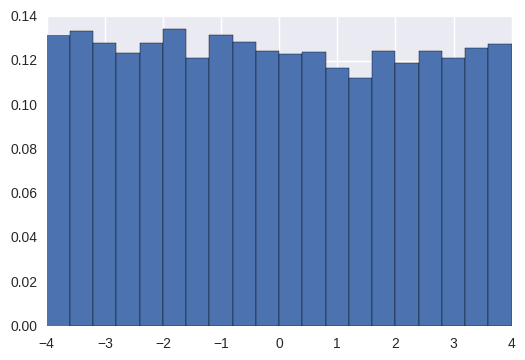

In [45]:
plt.hist(x1,normed=True,bins=20)

In [46]:
x2 = 0.9*x1 + eps[0]

(array([ 0.00170464,  0.0217341 ,  0.07010314,  0.12486455,  0.13210925,
         0.14532018,  0.14382862,  0.13743624,  0.14595942,  0.14148475,
         0.1389278 ,  0.12891306,  0.12763459,  0.13807548,  0.12933922,
         0.13615776,  0.13189617,  0.09141108,  0.03750198,  0.00639238]),
 array([-4.79792858, -4.32862004, -3.85931151, -3.39000298, -2.92069445,
        -2.45138592, -1.98207738, -1.51276885, -1.04346032, -0.57415179,
        -0.10484326,  0.36446528,  0.83377381,  1.30308234,  1.77239087,
         2.24169941,  2.71100794,  3.18031647,  3.649625  ,  4.11893353,
         4.58824207]),
 <a list of 20 Patch objects>)

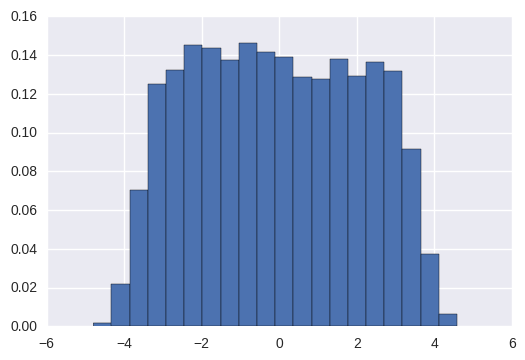

In [47]:
plt.hist(x2,normed=True,bins=20)

In [50]:
x = x1
for i in range(5):
    x = x*0.9 + eps[i]

(array([  2.02758665e-04,   1.82482799e-03,   6.69103595e-03,
          2.04786252e-02,   5.35282876e-02,   1.07259334e-01,
          1.58151759e-01,   1.84915903e-01,   2.18371082e-01,
          2.11882805e-01,   2.03569700e-01,   1.98095216e-01,
          1.95864871e-01,   1.73155900e-01,   1.34631754e-01,
          9.42827793e-02,   4.25793197e-02,   1.78427625e-02,
          3.44689731e-03,   8.11034660e-04]),
 array([-5.12091913, -4.62772196, -4.13452479, -3.64132762, -3.14813045,
        -2.65493328, -2.16173611, -1.66853894, -1.17534177, -0.6821446 ,
        -0.18894742,  0.30424975,  0.79744692,  1.29064409,  1.78384126,
         2.27703843,  2.7702356 ,  3.26343277,  3.75662994,  4.24982711,
         4.74302428]),
 <a list of 20 Patch objects>)

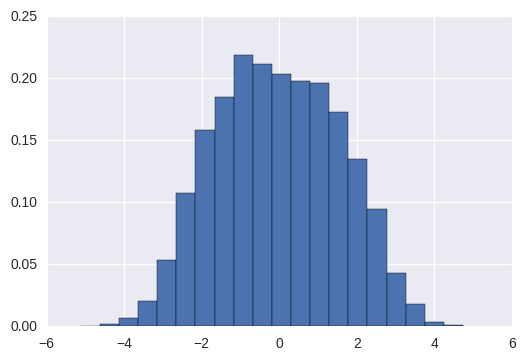

In [52]:
plt.hist(x,normed=True,bins=20)

In [53]:
x = x1
for i in range(10):
    x = x*0.9 + eps[i]

(array([ 0.00044269,  0.00044269,  0.00420553,  0.01150988,  0.02988141,
         0.06573909,  0.10890113,  0.17508291,  0.24369947,  0.28442672,
         0.29969944,  0.29925675,  0.25520935,  0.19721728,  0.12063235,
         0.06596044,  0.03253753,  0.01328063,  0.00420553,  0.00110672]),
 array([-4.79975101, -4.34796505, -3.8961791 , -3.44439314, -2.99260718,
        -2.54082122, -2.08903526, -1.6372493 , -1.18546334, -0.73367738,
        -0.28189142,  0.16989453,  0.62168049,  1.07346645,  1.52525241,
         1.97703837,  2.42882433,  2.88061029,  3.33239625,  3.78418221,
         4.23596816]),
 <a list of 20 Patch objects>)

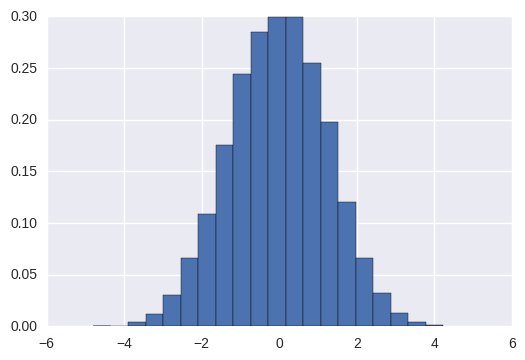

In [54]:
plt.hist(x,normed=True,bins=20)